In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "C:/Users/Dareen/OneDrive/Desktop/graduation/yawn_detection/dataset_new"
print(os.listdir(path))

['test', 'train']


In [3]:
train_path = path + '/train'
test_path = path + '/test'

In [4]:
train_classes = os.listdir(train_path)
print(train_classes)
test_classes = os.listdir(test_path)
print(test_classes)

['Closed', 'no_yawn', 'Open', 'yawn']
['Closed', 'no_yawn', 'Open', 'yawn']


In [5]:
img_size = 224
no_channel = 3

In [6]:
X_tr = []
y_tr = []
for label in train_classes:
    data_path = os.path.join(train_path, label)
    class_num = train_classes.index(label)
    for img in os.listdir(data_path):
            try:
                img_arr = cv2.imread(os.path.join(data_path, img))[...,::-1]
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                X_tr.append(resized_arr)
                y_tr.append(class_num)
            except Exception as e:
                print(e)

In [7]:
X_tr = np.asarray(X_tr)
X_tr = X_tr/255
y_tr = np.asarray(y_tr)
y_tr = to_categorical(y_tr)

In [8]:
X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, test_size = 0.2, random_state = 1)

In [9]:
X_test = []
y_test = []
for label in test_classes:
    data_path = os.path.join(test_path, label)
    class_num = test_classes.index(label)
    for img in os.listdir(data_path):
            try:
                img_arr = cv2.imread(os.path.join(data_path, img))[...,::-1]
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                X_test.append(resized_arr)
                y_test.append(class_num)
            except Exception as e:
                print(e)

In [10]:
X_test = np.asarray(X_test)
X_test = X_test/255
y_test = np.asarray(y_test)
y_test = to_categorical(y_test)

In [11]:
print('X pelatihan shape :', X_tr.shape)
print('y pelatihan shape :', y_tr.shape)
print('X validasi shape :', X_val.shape)
print('y validasi shape :', y_val.shape)
print('X pengujian shape :', X_test.shape)
print('y pengujian shape :', y_test.shape)

X pelatihan shape : (1973, 224, 224, 3)
y pelatihan shape : (1973, 4)
X validasi shape : (494, 224, 224, 3)
y validasi shape : (494, 4)
X pengujian shape : (433, 224, 224, 3)
y pengujian shape : (433, 4)


In [12]:
datagen = ImageDataGenerator(
        featurewise_center = False, # set input mean to 0 over the dataset
        samplewise_center = False, # set each sample mean to 0
        featurewise_std_normalization = False, # divide inputs by std of the dataset
        samplewise_std_normalization = False, # divide each input by its std
        zca_whitening = False, # apply ZCA whitening
        rotation_range = 0, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.25, # Randomly zoom image
        width_shift_range = 0.125, # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.125, # randomly shift images vertically (fraction of total height)
        horizontal_flip = True, # randomly flip images
        vertical_flip = False) # randomly flip images
datagen.fit(X_tr)

In [13]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = (img_size, img_size, no_channel)),
    MaxPooling2D(),
    Conv2D(filters = 64, kernel_size = 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(filters = 128, kernel_size = 3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units = 128, activation =  'relu'),
    Dense(units = 64, activation =  'relu'),
    Dense(units = 32, activation =  'relu'),
    Dropout(rate = 0.5),
    Dense(units = 4, activation = 'softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [15]:

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

In [16]:
epochs = 50

In [17]:
hist = model.fit(X_tr,
                 y_tr,
                 epochs = epochs,
                 validation_data = (X_val, y_val))

Epoch 1/50


62/62 [==============================] - 74s 1s/step - loss: 1.2070 - accuracy: 0.4334 - val_loss: 0.6389 - val_accuracy: 0.7126
Epoch 2/50
62/62 [==============================] - 63s 1s/step - loss: 0.7264 - accuracy: 0.6341 - val_loss: 0.4182 - val_accuracy: 0.8198
Epoch 3/50
62/62 [==============================] - 61s 990ms/step - loss: 0.5353 - accuracy: 0.7324 - val_loss: 0.3793 - val_accuracy: 0.8097
Epoch 4/50
62/62 [==============================] - 62s 1s/step - loss: 0.4699 - accuracy: 0.7456 - val_loss: 0.3446 - val_accuracy: 0.8462
Epoch 5/50
62/62 [==============================] - 63s 1s/step - loss: 0.4132 - accuracy: 0.7780 - val_loss: 0.3836 - val_accuracy: 0.8057
Epoch 6/50
62/62 [==============================] - 61s 988ms/step - loss: 0.4097 - accuracy: 0.7714 - val_loss: 0.3380 - val_accuracy: 0.8219
Epoch 7/50
62/62 [==============================] - 62s 1000ms/step - loss: 0.3740 - accuracy: 0.8023 - val_loss: 0.3156 - val_accuracy: 0.8462
Epoch 8/

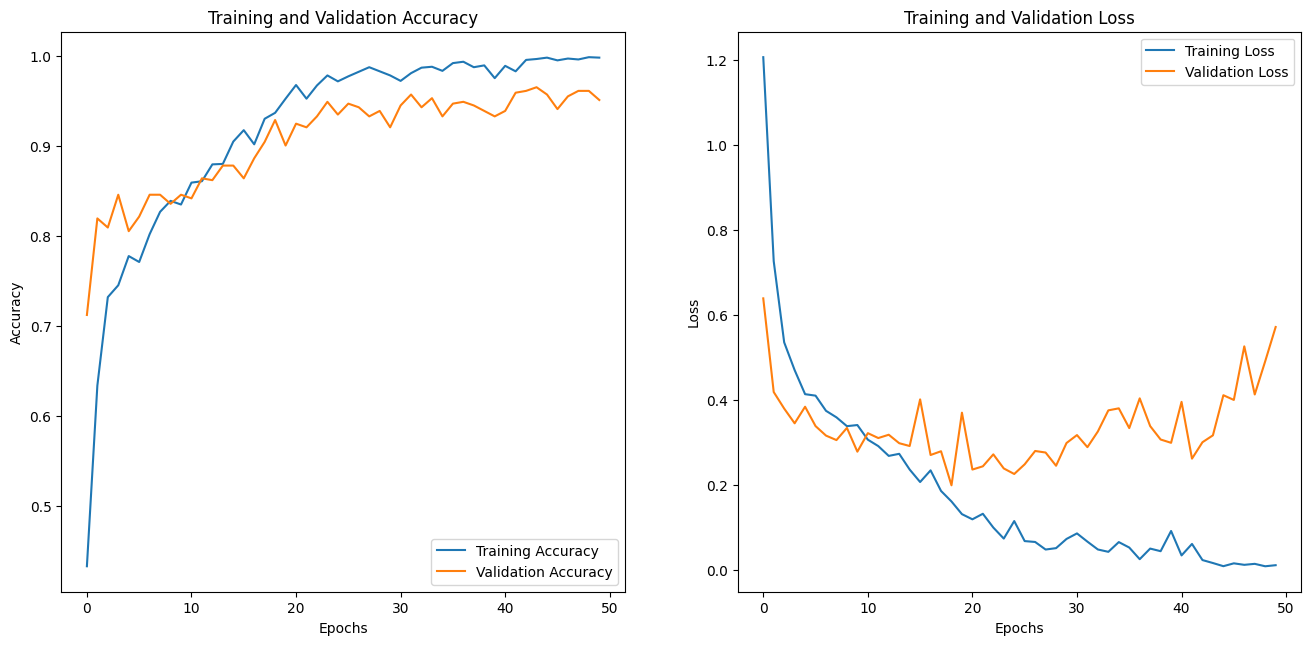

In [18]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (16, 16))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [19]:
pred_X = model.predict(X_test)
y_pred = np.argmax(pred_X, axis = 1)
y_test = np.argmax(y_test, axis = 1)

14/14 [==============================] - 1s 96ms/step


Text(0.5, 1.0, 'CNN Confusion Matrix')

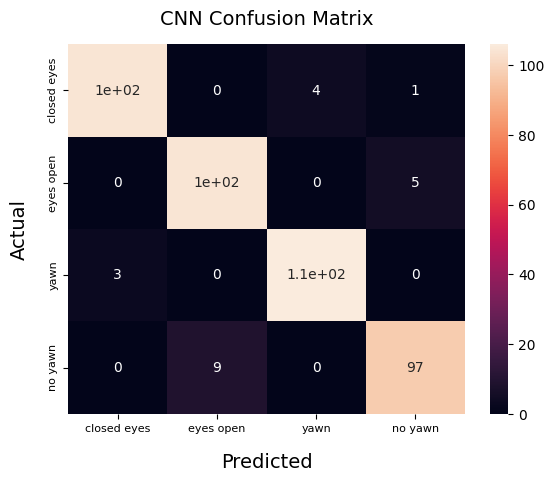

In [20]:
cm = confusion_matrix(y_test, y_pred)
hm = sns.heatmap(cm, annot = True)
hm.set_xlabel("Predicted", fontsize = 14, labelpad = 14)
hm.xaxis.set_ticklabels(['closed eyes', 'eyes open', 'yawn', 'no yawn'], fontsize = 8)
hm.set_ylabel("Actual", fontsize = 14, labelpad = 14)
hm.yaxis.set_ticklabels(['closed eyes', 'eyes open', 'yawn', 'no yawn'], fontsize = 8)
hm.set_title("CNN Confusion Matrix", fontsize = 14, pad = 14)

In [21]:
print(classification_report(y_test, y_pred, target_names = ['closed eyes', 'eyes open', 'yawn', 'no yawn']))

              precision    recall  f1-score   support

 closed eyes       0.97      0.95      0.96       109
   eyes open       0.92      0.95      0.94       109
        yawn       0.96      0.97      0.97       109
     no yawn       0.94      0.92      0.93       106

    accuracy                           0.95       433
   macro avg       0.95      0.95      0.95       433
weighted avg       0.95      0.95      0.95       433



In [22]:
model.save('c:/Users/Dareen/OneDrive/Desktop/graduation/yawn_model.h5')
from keras.models import load_model

# Load the model
yawn_model = load_model('c:/Users/Dareen/OneDrive/Desktop/graduation/yawn_model.h5')

In [23]:
cap = cv2.VideoCapture('C:/Users/Dareen/OneDrive/Desktop/graduation/istockphoto-1437249423-640_adpp_is.mp4')
import IPython.display as ipd
import subprocess 
ipd.Video("C:/Users/Dareen/OneDrive/Desktop/graduation/istockphoto-1311193318-640_adpp_is.mp4",width=400,height=400)
cap.get(cv2.CAP_PROP_FRAME_COUNT)
hight = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(hight,width)
size = 244
no_channel = 3


360.0 640.0


In [24]:
def preprocess_video(video_path, output_size=(224, 224)):

    frames = []
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
    
        frame = cv2.resize(frame, output_size)
        
        # Convert to RGB if not already
        if len(frame.shape) < 3 or frame.shape[2] == 1:
            frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
        
        frames.append(frame)
    
    cap.release()
    
    # Stack frames into a single numpy array
    video_array = np.stack(frames)
    
    return video_array

# Example usage:
video_path = 'C:/Users/Dareen/OneDrive/Desktop/graduation/istockphoto-1437249423-640_adpp_is.mp4'
processed_video = preprocess_video(video_path)

# Check the shape of the processed video
print(processed_video.shape)  # This should print (num_frames, height, width, channels)

(444, 224, 224, 3)


In [25]:
model.predict(processed_video)


14/14 [==============================] - 1s 95ms/step


array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)